Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.subplots as sp
from plotly.offline import iplot
import plotly.graph_objects as go
import plotly.figure_factory as ff
import plotly.io as pio
import warnings

In [2]:
df_og=pd.read_csv('Insurance.csv')
df=df_og.copy()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df

age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]

In [5]:
df.drop_duplicates()

age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1337 rows x 7 columns]

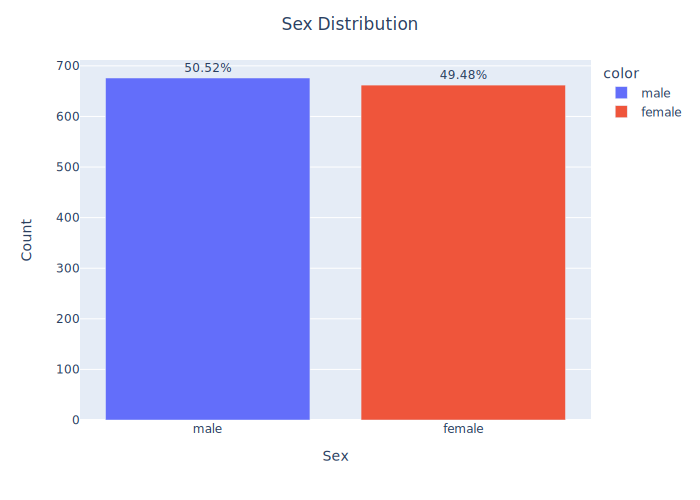

In [6]:
counts = df['sex'].value_counts()
percentages = df['sex'].value_counts(normalize=True) * 100
plot_df = pd.DataFrame({'Sex': counts.index, 'Count': counts.values, 'Percentage': percentages.values})
fig = px.bar(plot_df, x='Sex', y='Count', text='Percentage',color=["male","female"])
fig.update_traces(texttemplate='%{text:.2f}%', textposition='outside')
fig.update_layout(title='Sex Distribution',title_x = 0.5)
fig.show("svg")

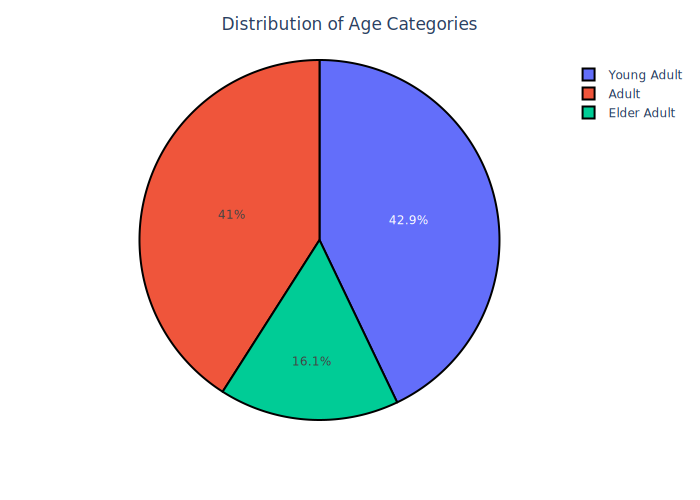

In [7]:
def categorize_age(age):
    if age>=18 and age<=35:
        return "Young Adult"
    elif age>35 and age<=55:
        return "Adult"
    else:
        return "Elder Adult"
df['age']=df['age'].apply(categorize_age)
age_count = df['age'].value_counts()
fig=px.pie(values=age_count.values,names=age_count.index)
fig.update_layout(title='Distribution of Age Categories',title_x=0.5)
fig.update_traces(marker=dict(line=dict(color='#000000',width=2)))
fig.show("svg")

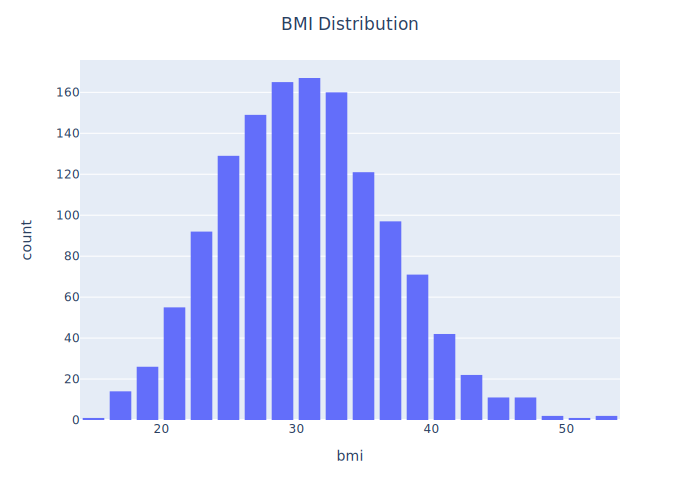

In [8]:
fig=px.histogram(df, x='bmi', nbins=30).update_layout(bargap=0.2,title='BMI Distribution',title_x = 0.5)
fig.show("svg")

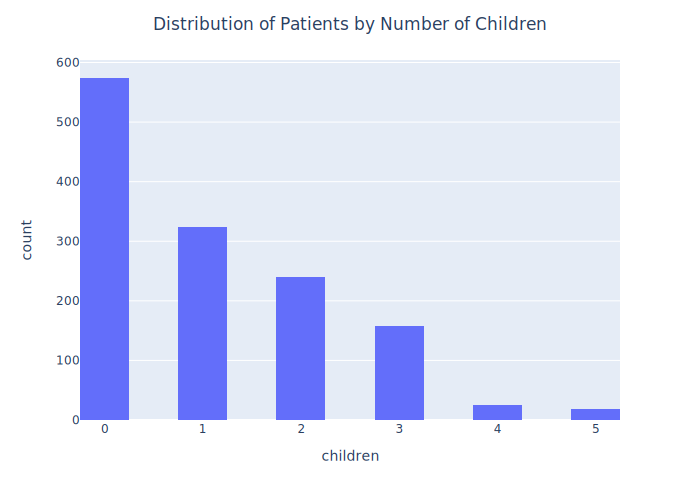

In [9]:
fig=px.histogram(df,x='children',nbins=20).update_layout(title='Distribution of Patients by Number of Children',title_x=0.5)
fig.show("svg")

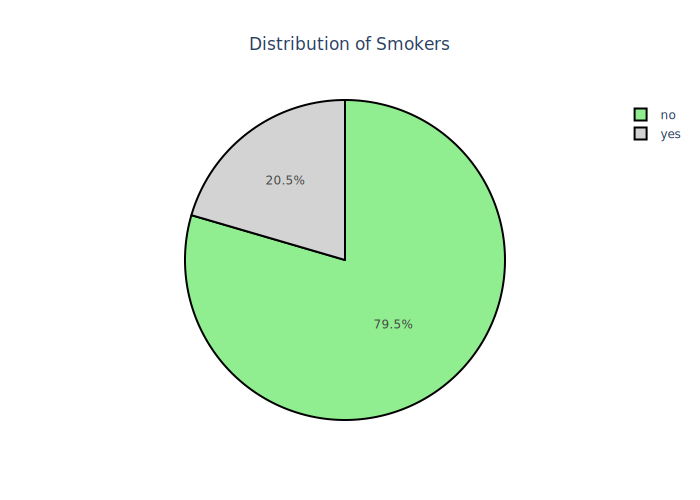

In [10]:
fig = px.pie(values=df['smoker'].value_counts().values, names=df['smoker'].value_counts().index,
             title='Distribution of Smokers',color_discrete_sequence=['lightgreen','lightgray'])
fig.update_layout(title_x=0.5)
fig.update_traces(marker=dict(line=dict(color='#000000',width=2)))
fig.show("svg")

ANOVA test on the variable Age and BMI

In [11]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('age ~ bmi',data = df_og).fit()
annova_result = sm.stats.anova_lm(model,type=2)
print(model.summary())
print(annova_result)

                            OLS Regression Results                            
Dep. Variable:                    age   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     16.15
Date:                Thu, 25 Apr 2024   Prob (F-statistic):           6.19e-05
Time:                        03:38:42   Log-Likelihood:                -5425.8
No. Observations:                1338   AIC:                         1.086e+04
Df Residuals:                    1336   BIC:                         1.087e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     31.4873      1.959     16.074      0.0

In [12]:
corr = df_og.corr()
fig = ff.create_annotated_heatmap(z=corr.values, x=list(corr.columns), y=list(corr.index), colorscale='Viridis')
fig.update_layout(title='Correlation Heatmap', xaxis=dict(title='Variable'), yaxis=dict(title='Variable'))
fig.show()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_5864\837580208.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



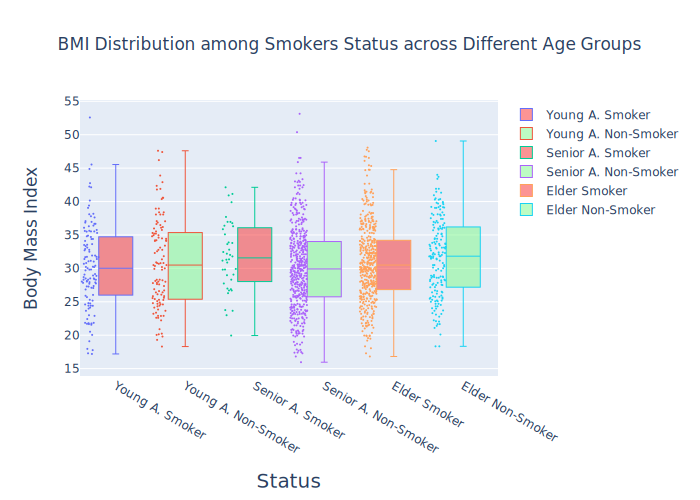

In [13]:
YA_smoker = df['bmi'].loc[(df['age']=='Young Adult') & (df['smoker'] == 'yes')].values
A_smoker = df['bmi'].loc[(df['age']=='Adult') & (df['smoker'] == 'yes')].values
E_smoker =  df['bmi'].loc[(df['age']=='Elder Adult') & (df['smoker'] == 'yes')].values

YA_nonsmoker = df['bmi'].loc[(df['age']=='Young Adult') & (df['smoker'] =='no')].values
A_nonsmoker = df['bmi'].loc[(df['age']=='Adult') & (df['smoker']=='no')].values
E_nonsmoker = df['bmi'].loc[(df['age'] =='Elder Adult') & (df['smoker']=='no')].values

x_data = ['Young A. Smoker', 'Young A. Non-Smoker',
          'Senior A. Smoker', 'Senior A. Non-Smoker',
          'Elder Smoker', 'Elder Non-Smoker',]

y0 = YA_smoker
y1 = A_smoker
y2 = E_smoker
y3 = YA_nonsmoker
y4 = A_nonsmoker
y5 = E_nonsmoker

y_data=[y0,y1,y2,y3,y4,y5]

colors = ['rgba(251, 43, 43, 0.5)', 'rgba(125, 251, 137, 0.5)', 
          'rgba(251, 43, 43, 0.5)', 'rgba(125, 251, 137, 0.5)', 
          'rgba(251, 43, 43, 0.5)', 'rgba(125, 251, 137, 0.5)']

traces = []
for xd, yd, cls in zip(x_data, y_data,colors):
        traces.append(go.Box(
            y=yd,
            name=xd,
            boxpoints='all',
            jitter=0.5,
            whiskerwidth=0.2,
            fillcolor=cls,
            marker=dict(size=2,),
            line=dict(width=1),))

layout = go.Layout(
    title='BMI Distribution among Smokers Status across Different Age Groups',
    xaxis=dict(title="Status",
    titlefont=dict(
    size=20)),
    yaxis=dict(title="Body Mass Index",
        autorange=True,
        showgrid=True,
        zeroline=True,
        dtick=5,
        gridwidth=1,
        zerolinewidth=5,
        titlefont=dict(size=17)),)

fig = go.Figure(data=traces, layout=layout)
fig.update_layout(title_x=0.5)
fig.show("svg")

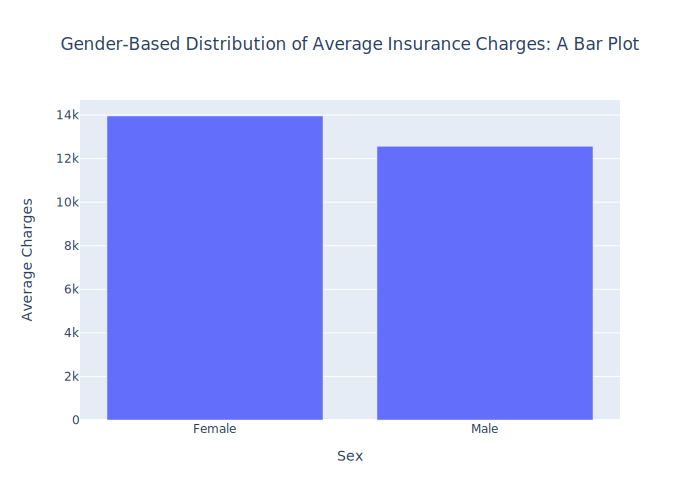

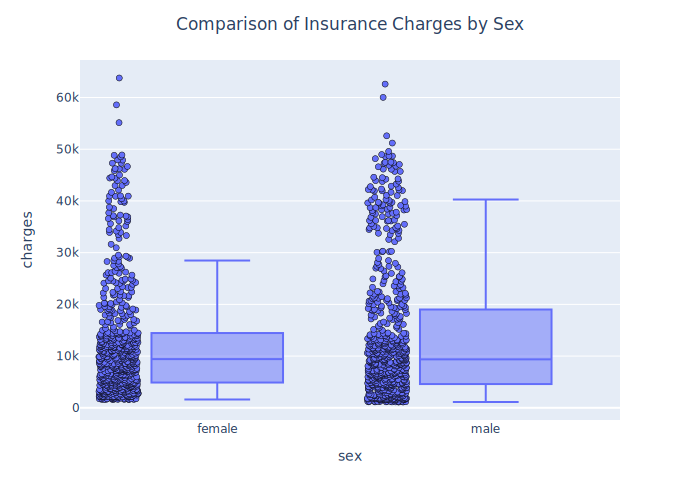

In [14]:
fig1=px.box(df,x=df['sex'],y=df['charges'],points='all')
avg_m_charges=df['charges'].loc[df['sex']=='female'].mean()
avg_f_charges=df['charges'].loc[df['sex']=='male'].mean()
fig = go.Figure(data=go.Bar(x=['Female','Male'],
                           y=[avg_f_charges,avg_m_charges],
                           name='Mean'))
fig1.update_traces(marker=dict(line=dict(color='black',width=0.5)))
fig.update_layout(title='Gender-Based Distribution of Average Insurance Charges: A Bar Plot',title_x=0.5,
                       xaxis_title='Sex',
                       yaxis_title='Average Charges')
fig1.update_layout(title='Comparison of Insurance Charges by Sex',title_x=0.5)
fig.show("svg")
fig1.show("svg")

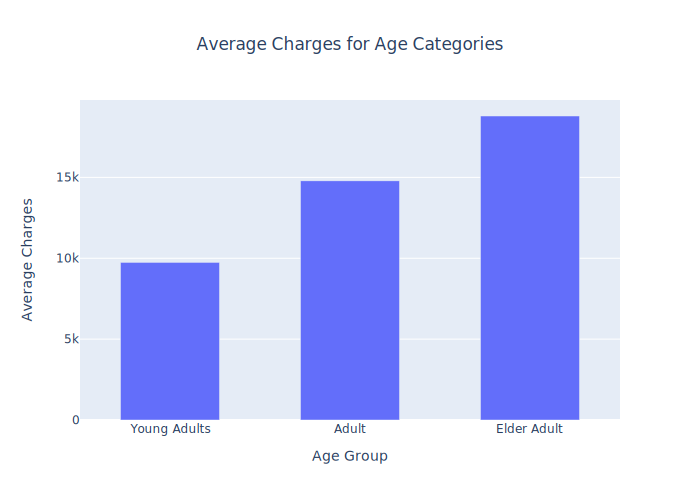

In [15]:
mean_ya_charges = df['charges'].loc[df['age'] == 'Young Adult'].mean()
mean_a_charges = df['charges'].loc[df['age'] == 'Adult'].mean()
mean_ea_charges = df['charges'].loc[df['age'] == 'Elder Adult'].mean()
avg_plot = go.Figure(data=[go.Bar(x=['Young Adults','Adult','Elder Adult'],
                                  y=[mean_ya_charges,mean_a_charges,mean_ea_charges],
                                  name='Mean',width=0.55)])
avg_plot.update_layout(title = 'Average Charges for Age Categories',
                       title_x = 0.5,
                       xaxis_title='Age Group',
                       yaxis_title='Average Charges')
avg_plot.show("svg")

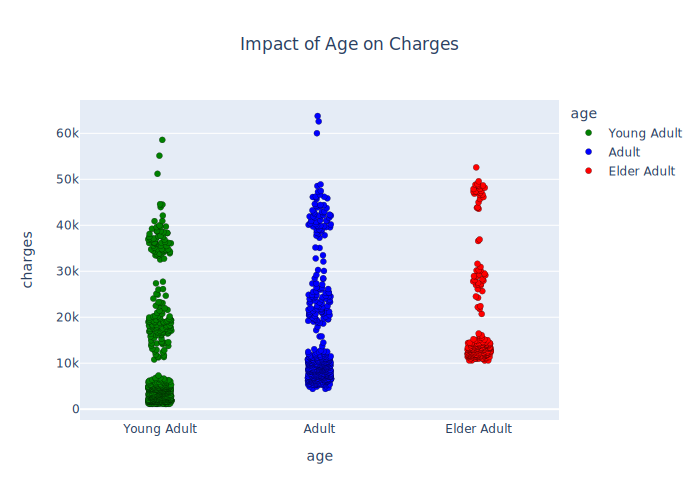

In [16]:
fig=px.strip(df,x="age",y="charges",color='age',color_discrete_map={'Young Adult': 'green', 'Adult': 'blue',
                                                        'Elder Adult':'red'},
             title='Impact of Age on Charges')
fig.update_traces(marker=dict(line=dict(color='black',width=0.25)))
fig.layout.title.x=0.5
fig.show("svg")

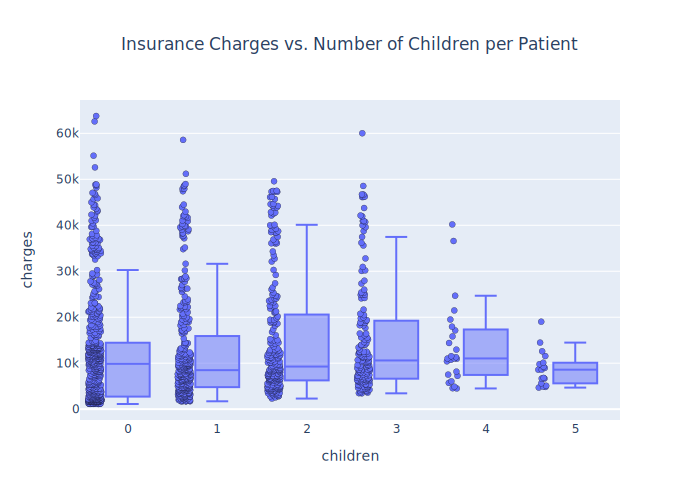

In [17]:
fig=px.box(df,x="children",y="charges",points="all",title='Insurance Charges vs. Number of Children per Patient')
fig.update_traces(marker=dict(line=dict(color='black',width=0.25)))
fig.update_layout(title_x=0.5)
fig.show("svg")

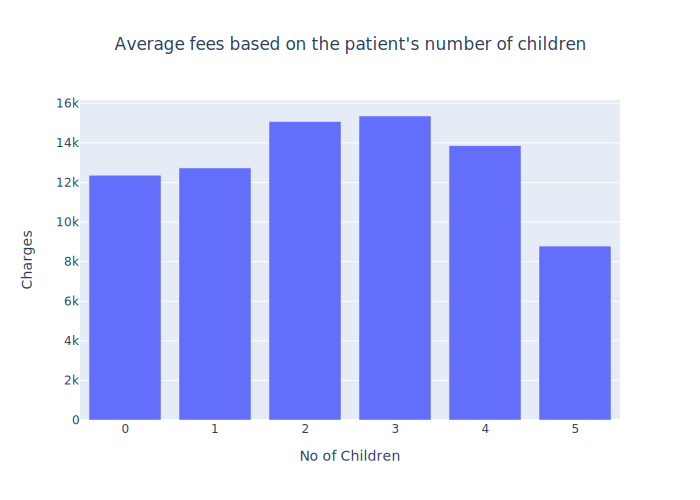

In [18]:
avg_of_z=df['charges'].loc[df['children']== 0].mean()
avg_of_1=df['charges'].loc[df['children']== 1].mean()
avg_of_2=df['charges'].loc[df['children']== 2].mean()
avg_of_3=df['charges'].loc[df['children']== 3].mean()
avg_of_4=df['charges'].loc[df['children']== 4].mean()
avg_of_5=df['charges'].loc[df['children']== 5].mean()
{'0':'green','1':'green','2':'green','3':'green','4':'green',
                                    '5':'green'}
fig=go.Figure(
    data=[go.Bar(x=['0','1','2','3','4','5'],
                y=[avg_of_z,avg_of_1,avg_of_2,avg_of_3,avg_of_4,avg_of_5],name='Mean')])
fig.update_layout(title='Average fees based on the patient\'s number of children',title_x=0.5,
                 xaxis_title='No of Children',
                 yaxis_title='Charges')
fig.show("svg")

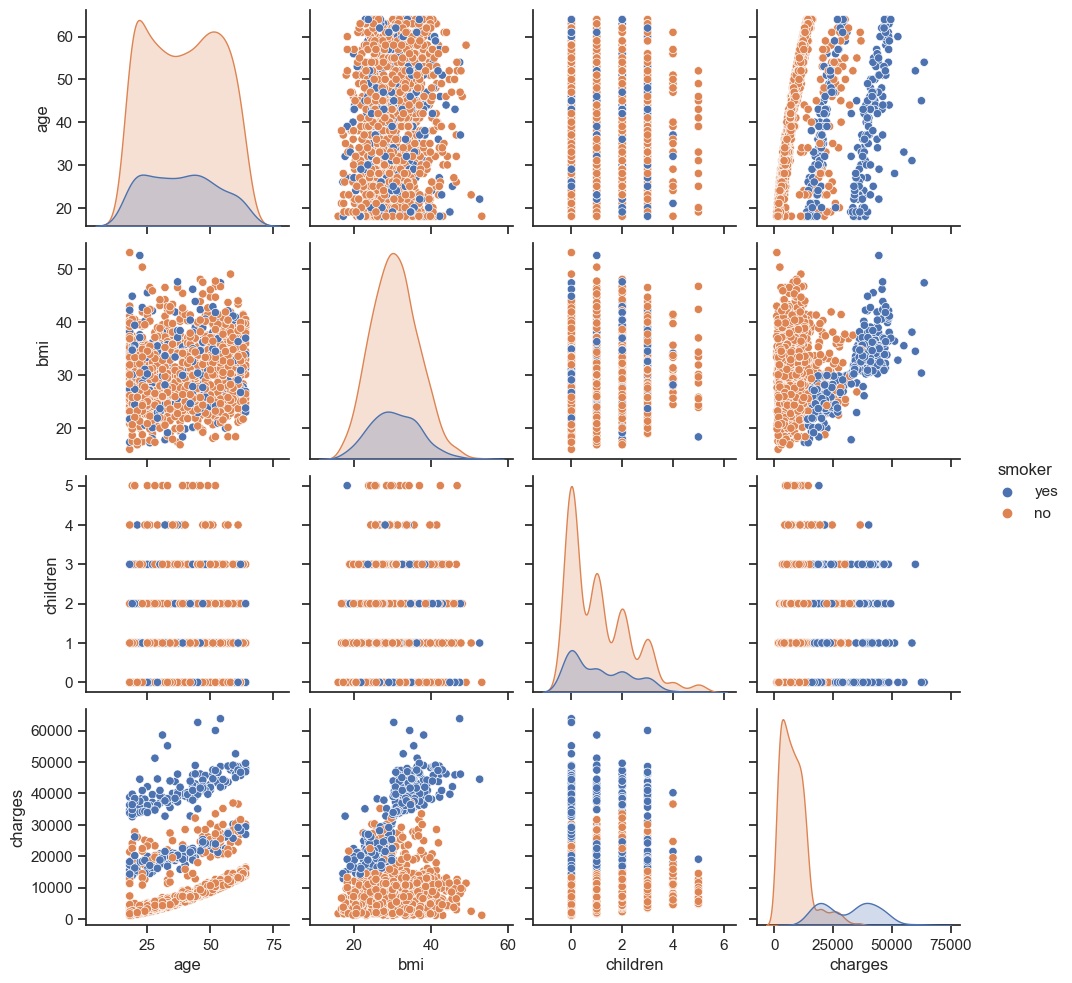

In [19]:
import seaborn as sns
sns.set(style = "ticks")
sns.pairplot(df_og,hue="smoker")

In [20]:
def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 25:
        return 'Normal Weight'
    elif 25 <= bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'

df_og['weight_condition'] = df_og['bmi'].apply(categorize_bmi)


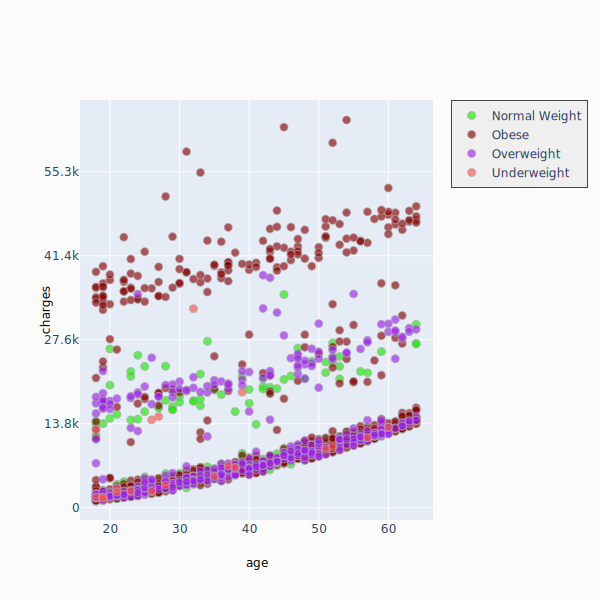

In [48]:
fig=ff.create_facet_grid(
df_og,
x='age',
y='charges',
color_name='weight_condition',
show_boxes=False,
marker={'size': 8, 'opacity': 0.65},
colormap={'Underweight':'rgb(255,83,73)','Normal Weight':'rgb(25,234,0)','Overweight':'rgb(160,32,240)',
         'Obese':'rgb(139,0,0)'})
fig.show("svg")

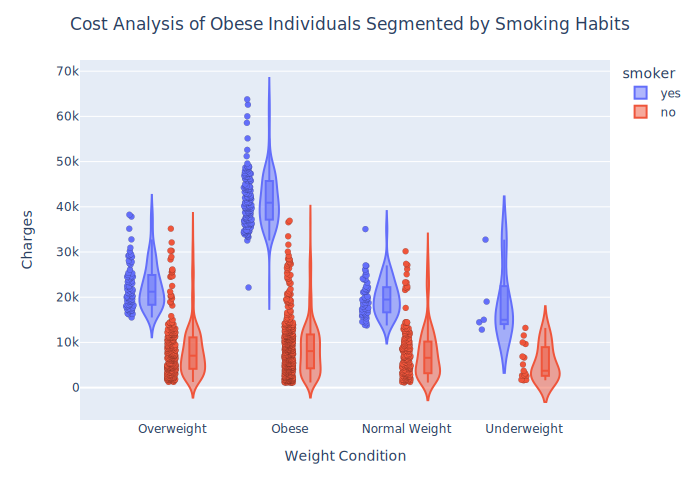

In [32]:
fig = px.violin(df_og, x='weight_condition', y='charges', color='smoker', box=True, points="all",
                hover_data=df.columns)
fig.update_layout(title='Cost Analysis of Obese Individuals Segmented by Smoking Habits',
                  xaxis_title='Weight Condition',
                  yaxis_title='Charges',
                 title_x=0.5)
fig.update_traces(marker=dict(line=dict(color='black',width=0.12)))
fig.show("svg")

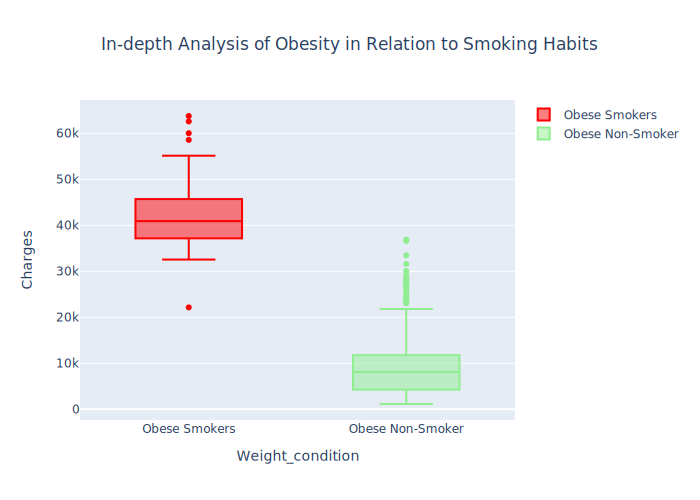

In [34]:
o_s=df_og['charges'].loc[(df_og['weight_condition']=='Obese') & (df_og['smoker']=='yes')].values
o_ns=df_og['charges'].loc[(df_og['weight_condition']=='Obese') & (df_og['smoker']=='no')].values

trace1 = go.Box(y=o_s,
         name='Obese Smokers',
               marker=dict(
               color='#ff0000'))
trace2 = go.Box(y=o_ns,
               name = 'Obese Non-Smoker',
               marker=dict(
               color = '#90EE90'))
data=[trace1,trace2]

layout = dict(title="In-depth Analysis of Obesity in Relation to Smoking Habits",
              title_x=0.5,
             xaxis=dict(
             title="Weight_condition"),
             yaxis=dict(title="Charges"))
fig = go.Figure(data=data, layout=layout)
fig.show("svg")

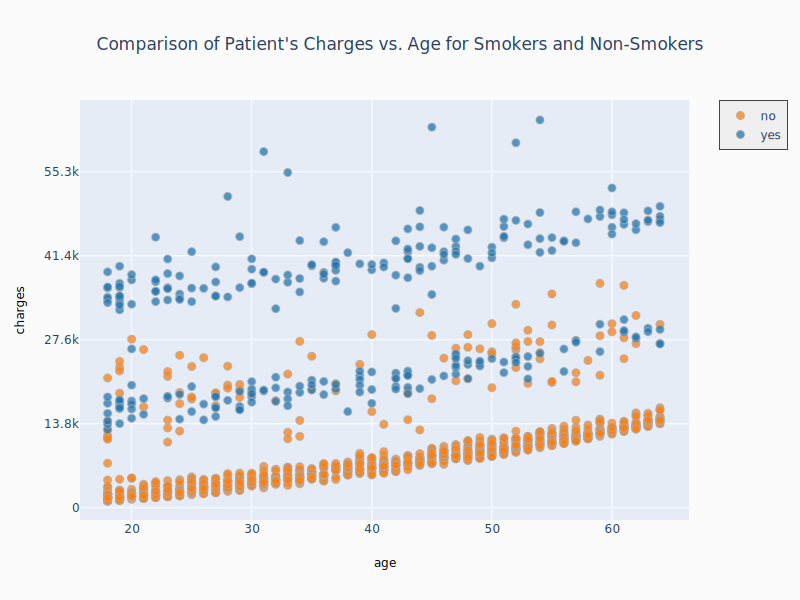

In [36]:
fig=ff.create_facet_grid(
df_og,
x='age',
y='charges',
color_name='smoker',
show_boxes=False,
marker={'size':8,'opacity':0.75})
fig['layout'].update(title='Comparison of Patient\'s Charges vs. Age for Smokers and Non-Smokers',
                     width=800,height=600,title_x=0.5)
fig.show("svg")

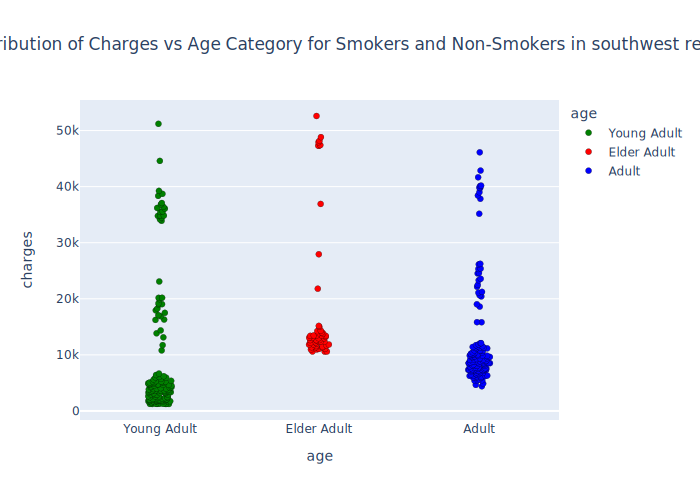

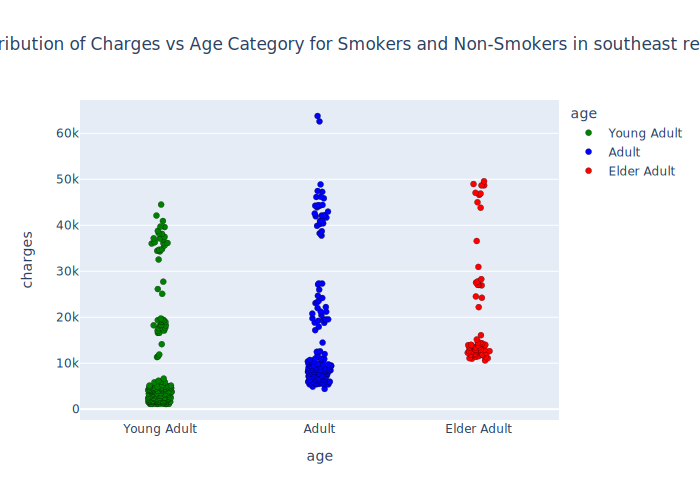

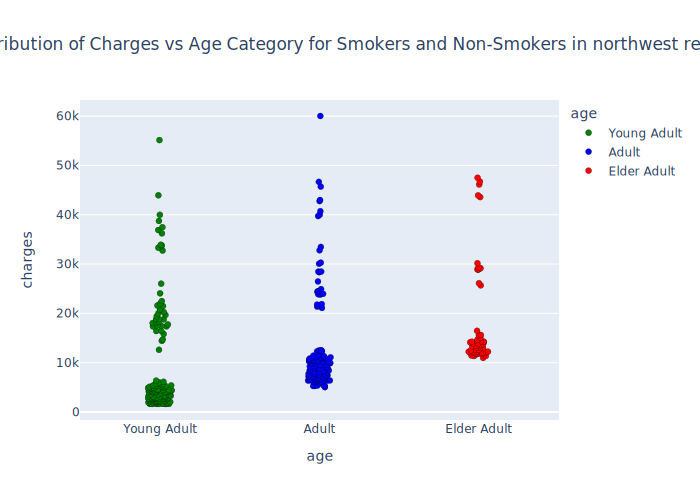

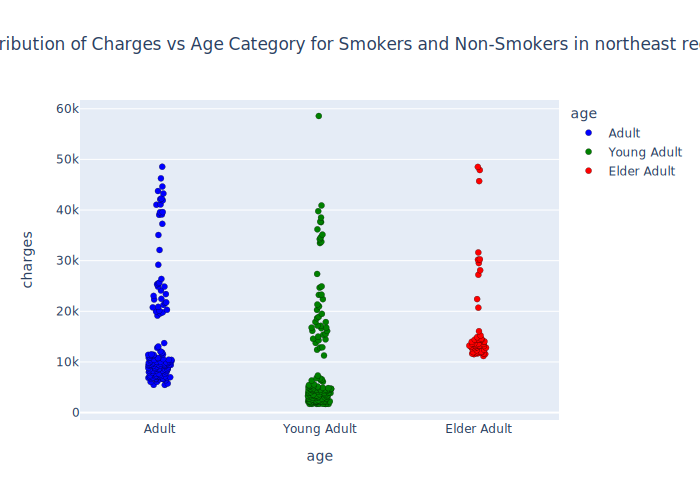

In [37]:
unique_regions = df['region'].unique()

for region in unique_regions:
    fig=px.strip(df[df['region']==region],x="age",y="charges",color='age',color_discrete_map={'Young Adult': 'green', 'Adult': 'blue',
                                                        'Elder Adult':'red'},
             title=f"Distribution of Charges vs Age Category for Smokers and Non-Smokers in {region} region")
    fig.update_traces(marker=dict(line=dict(color='black',width=0.25)))
    fig.layout.title.x=0.5
    fig.show("svg")

Unsupervised Learning :

In [38]:
X=df.iloc[:,[2,6]].values

C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.

C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.

C:\Users\ADM

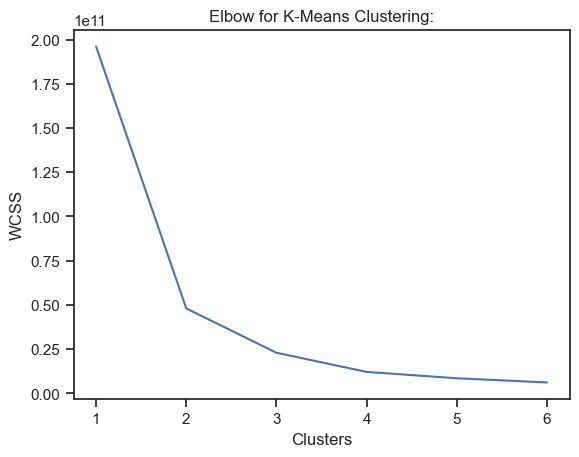

In [39]:
#K-Means Clustering
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,7):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=None)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,7),wcss)
plt.title('Elbow for K-Means Clustering:')
plt.xlabel('Clusters')
plt.ylabel('WCSS')
plt.show()

In [40]:
kmeans=KMeans(n_clusters=3,init='k-means++',random_state=None)
y_kmeans=kmeans.fit_predict(X)
print(y_kmeans)

C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.



[2 1 1 ... 1 1 2]


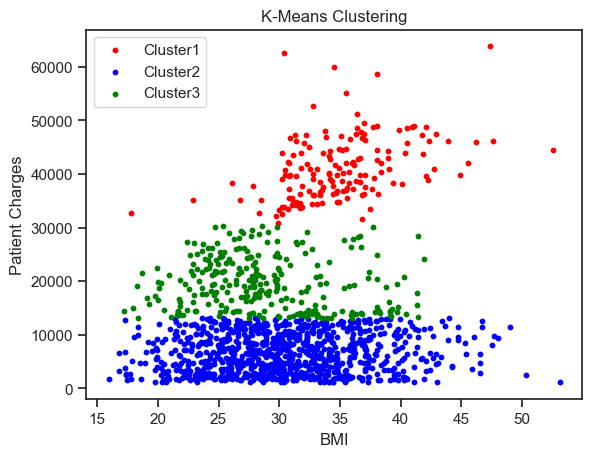

In [41]:
plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1],s=10,color='red',label='Cluster1')
plt.scatter(X[y_kmeans==1,0],X[y_kmeans==1,1],s=10,color='blue',label='Cluster2')
plt.scatter(X[y_kmeans==2,0],X[y_kmeans==2,1],s=10,color='green',label='Cluster3')
plt.legend()
plt.title('K-Means Clustering')
plt.xlabel('BMI')
plt.ylabel('Patient Charges')
plt.show()

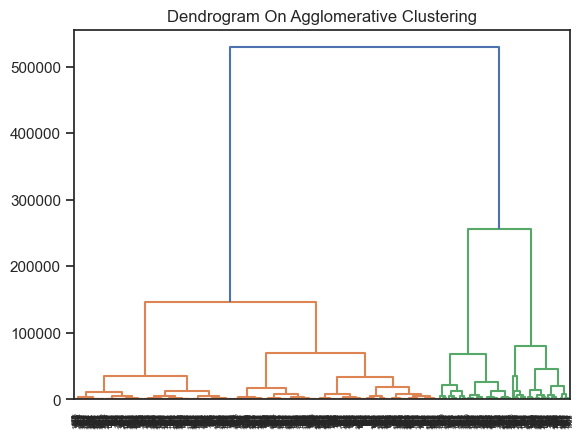

In [42]:
#hierarchical Clustering
import scipy.cluster.hierarchy as sch
Dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram On Agglomerative Clustering')
plt.show()

In [43]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='ward')
y_Agg=hc.fit_predict(X)

C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead



In [44]:
print(y_Agg)

[2 3 3 ... 3 3 2]


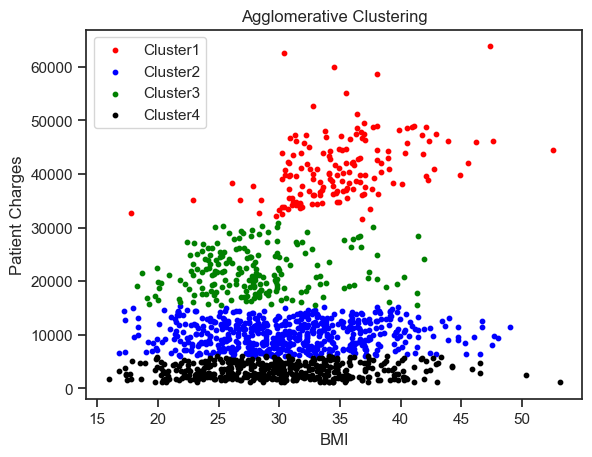

In [45]:
plt.scatter(X[y_Agg==0,0],X[y_Agg==0,1],s=10,color='red',label='Cluster1')
plt.scatter(X[y_Agg==1,0],X[y_Agg==1,1],s=10,color='blue',label='Cluster2')
plt.scatter(X[y_Agg==2,0],X[y_Agg==2,1],s=10,color='green',label='Cluster3')
plt.scatter(X[y_Agg==3,0],X[y_Agg==3,1],s=10,color='black',label='Cluster4')
plt.legend()
plt.title('Agglomerative Clustering')
plt.xlabel('BMI')
plt.ylabel('Patient Charges')
plt.show()